In [6]:

import pandas as pd
import numpy as np

In [7]:
#loading data sets
expr_data = pd.read_csv('expr.txt', sep= "\t", header='infer')
pheno_data = pd.read_csv('pheno.txt', sep= "\t", header='infer')

In [8]:
expr_data.head()


,GENE,GSM177886,GSM177888,GSM177890,GSM177893,GSM177894,GSM177895,GSM177896,GSM177900,GSM177904,...,GSM36920,GSM36921,GSM36932,GSM36936,GSM36946,GSM36951,GSM36971,GSM36997,GSM37018,GSM37032
0,1007_s_at,12.2321,12.7247,12.0137,12.4415,12.3090,12.2880,12.7309,12.6871,12.1845,...,13.0898,12.9686,12.7418,12.7150,13.3745,14.0554,12.3963,12.7346,12.9453,12.5463
1,1053_at;RFC2,10.4610,10.2661,9.9722,10.2573,10.1558,10.7785,9.6086,10.1865,10.0060,...,8.9753,8.7124,8.6243,8.4209,9.2642,8.2724,7.5782,6.3040,9.5307,9.0704
2,117_at;HSPA6,9.1020,8.2479,7.4331,8.2079,6.0089,7.9066,7.3590,8.1080,7.3677,...,9.1137,9.1201,8.5506,9.0224,8.9120,8.4566,8.9916,8.9978,8.8577,8.9840
3,121_at;PAX8,10.1887,10.7472,10.3992,10.9866,10.2796,10.5001,10.0703,10.2145,10.4407,...,10.6725,11.4304,11.3647,10.9312,10.8711,10.9831,11.3248,11.0470,11.0053,11.3833
4,1255_g_at;GUCA1A,6.4191,6.8486,4.4546,3.7594,6.8940,5.5555,5.5382,4.4643,7.4830,...,6.5679,6.8291,6.7157,5.2477,5.4634,7.5457,7.0202,7.8120,7.1757,7.1892


In [9]:
pheno_data.head()
pheno_data.shape

(212, 2)

In [10]:
#creating new column for class
pheno_data['RelapseGroup_new'] = np.zeros(pheno_data.shape[0])
i = 0
while (i < pheno_data.shape[0]):
    if pheno_data['RelapseGroup'][i] == 'Relapse':
        pheno_data['RelapseGroup_new'][i] = 1
        i = i + 1
    else:
        pheno_data['RelapseGroup_new'][i] = 0
        i = i + 1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
pheno_data.head()

,GEO_ACCESSION,RelapseGroup,RelapseGroup_new
0,GSM177886,Relapse,1.0
1,GSM177888,Relapse,1.0
2,GSM177890,NoRelapse,0.0
3,GSM177893,NoRelapse,0.0
4,GSM177894,Relapse,1.0


In [12]:
expr_data = expr_data.T
expr_data.head()

expr_data.drop('GENE', axis = 0, inplace=True)

#keep copy to match gene with index later

In [13]:
#convert type to float, add phenotype class data as column in expression data
expr_data = expr_data.astype(float)
expr_data['Phenotype'] = np.zeros(pheno_data.shape[0])
pheno_data.set_index('GEO_ACCESSION',drop = True, inplace = True)
phenotype = pheno_data.loc[:,'RelapseGroup_new']
expr_data.index.name = 'GEO_ACCESSION'
expr_data['Phenotype'] = phenotype


In [14]:
expr_data['Phenotype'] = phenotype
corr = expr_data.corr()
corr
#find corr between every column(genes and phenotype)

,0,1,2,3,4,5,6,7,8,9,...,22206,22207,22208,22209,22210,22211,22212,22213,22214,Phenotype
0,1.000000,-0.333713,0.270346,0.609830,0.323696,0.234037,0.471851,-0.007298,-0.343675,0.354903,...,0.125936,0.440286,0.408739,-0.232297,0.153763,0.386896,0.425489,0.627885,0.221807,-0.113134
1,-0.333713,1.000000,-0.211378,-0.542256,-0.208413,-0.280884,-0.524272,-0.042583,0.212691,-0.353970,...,-0.130946,-0.417615,-0.308865,0.523695,0.253806,0.098312,-0.276959,-0.530745,-0.022173,0.078362
2,0.270346,-0.211378,1.000000,0.310047,0.252504,0.214633,0.254730,-0.070494,-0.082398,0.230549,...,0.156587,0.251418,0.242631,-0.099638,0.098085,-0.030246,0.198534,0.325407,0.142525,-0.075501
3,0.609830,-0.542256,0.310047,1.000000,0.416309,0.339506,0.618249,0.007766,-0.296421,0.406651,...,0.147140,0.448629,0.585002,-0.374425,0.116125,0.221336,0.190582,0.820073,0.107345,-0.127553
4,0.323696,-0.208413,0.252504,0.416309,1.000000,0.135147,0.286171,0.057803,-0.212046,0.132064,...,0.147093,0.230953,0.325023,-0.118599,0.079857,0.136504,0.039765,0.387118,0.093063,-0.043451
5,0.234037,-0.280884,0.214633,0.339506,0.135147,1.000000,0.249602,0.048608,0.080140,0.143232,...,0.047519,0.193826,0.083788,-0.230044,0.121648,0.007938,0.223105,0.292434,0.002445,-0.266724
6,0.471851,-0.524272,0.254730,0.618249,0.286171,0.249602,1.000000,0.002971,-0.200268,0.381739,...,0.143404,0.348362,0.509911,-0.189157,0.073817,0.134130,0.134934,0.618183,0.083300,-0.152460
7,-0.007298,-0.042583,-0.070494,0.007766,0.057803,0.048608,0.002971,1.000000,-0.122218,-0.028861,...,0.048214,-0.137892,-0.053925,0.034374,-0.014176,0.134898,-0.072340,0.043232,-0.175472,0.022248
8,-0.343675,0.212691,-0.082398,-0.296421,-0.212046,0.080140,-0.200268,-0.122218,1.000000,-0.145883,...,-0.004440,-0.082759,-0.144528,0.081415,0.072066,-0.248476,-0.123863,-0.362278,0.078030,-0.040985
9,0.354903,-0.353970,0.230549,0.406651,0.132064,0.143232,0.381739,-0.028861,-0.145883,1.000000,...,0.048891,0.281946,0.358476,-0.133967,-0.007219,0.037269,0.118442,0.394259,0.199262,-0.103360


In [15]:
corr.sort_values(by=['Phenotype'])
#show rank of neg correlation of genes with respect to class

,0,1,2,3,4,5,6,7,8,9,...,22206,22207,22208,22209,22210,22211,22212,22213,22214,Phenotype
19838,0.307927,-0.345495,0.163376,0.493576,0.220129,0.249318,0.369165,0.072107,-0.178785,0.151377,...,0.035247,0.146296,0.206647,-0.267947,0.120782,0.168309,0.090686,0.498529,0.041705,-0.343179
895,-0.100228,-0.307156,-0.067025,0.052682,0.006679,0.287619,0.049063,0.100511,0.194839,0.021178,...,0.078878,0.055178,-0.133899,-0.395020,0.038046,0.038570,0.087704,0.027716,0.000406,-0.341068
14514,0.191060,-0.120214,-0.008859,0.243995,0.036006,0.185596,0.196692,0.000012,-0.055609,0.022367,...,-0.028961,0.194101,0.223710,-0.130114,0.136286,0.095085,0.100781,0.240084,0.137516,-0.320605
15104,0.347094,0.017446,0.168200,0.186779,0.165648,0.167139,0.092434,-0.052648,-0.089371,0.099832,...,0.086397,0.148996,0.152196,-0.027256,0.295851,0.372154,0.183075,0.321045,0.146603,-0.315636
9704,0.102732,-0.022180,0.079161,0.328490,0.185865,0.340162,0.097905,0.131771,-0.098564,-0.044678,...,0.036489,-0.027293,-0.028381,-0.170839,0.166903,0.153493,0.114603,0.192592,-0.136830,-0.313616
7948,0.190696,-0.195386,0.071959,0.083396,-0.064877,0.365653,0.060355,0.138451,-0.112003,0.064795,...,0.020800,0.047673,-0.049676,-0.182865,0.173316,0.191197,0.286919,0.082608,-0.049709,-0.307942
4537,0.007666,-0.241816,-0.013308,0.166410,0.114652,0.315092,0.010822,0.093062,-0.099291,0.016181,...,0.124671,0.091986,-0.058961,-0.331810,-0.024130,0.034239,0.120537,0.124689,-0.156420,-0.304910
18993,0.163823,0.047217,0.001384,0.055615,0.157473,0.152566,-0.042740,-0.032739,-0.070447,-0.085377,...,0.035873,0.002189,-0.073110,-0.127353,0.163010,0.181516,0.158486,0.028973,0.014715,-0.301607
1545,0.040846,-0.084781,-0.045519,-0.009665,-0.091782,0.248681,-0.087041,0.011506,0.104505,-0.090459,...,-0.070889,-0.054020,-0.199459,-0.318767,0.117563,0.173925,0.246661,-0.023587,-0.110717,-0.299180
1913,0.205340,-0.004103,-0.048977,0.058670,0.033300,0.218187,0.080090,0.122422,-0.177504,0.023230,...,-0.027292,-0.073604,-0.103594,-0.194559,0.356412,0.452037,0.065920,0.092748,0.003114,-0.298365


In [16]:
corr.sort_values(by=['Phenotype'],ascending=False)
#pos corr w phenotype

,0,1,2,3,4,5,6,7,8,9,...,22206,22207,22208,22209,22210,22211,22212,22213,22214,Phenotype
Phenotype,-0.113134,0.078362,-0.075501,-0.127553,-0.043451,-0.266724,-0.152460,0.022248,-0.040985,-0.103360,...,-0.059285,-0.021431,0.012331,0.142458,-0.070742,-0.201531,-0.074907,-0.155844,-0.012274,1.000000
8190,-0.270515,0.308191,-0.047498,-0.286093,-0.093527,-0.288791,-0.260844,-0.100113,0.091242,-0.089225,...,-0.052590,-0.065360,0.047353,0.301322,-0.130956,-0.202960,-0.182796,-0.267934,-0.001320,0.400609
14085,-0.283020,0.472947,-0.067469,-0.351191,-0.046148,-0.330694,-0.310992,-0.142804,0.102995,-0.218631,...,-0.037730,-0.169158,0.041032,0.434715,-0.087270,-0.141360,-0.144487,-0.310684,0.067660,0.392536
18363,-0.216479,0.180424,-0.123526,-0.211872,-0.055901,-0.344819,-0.190720,-0.093479,0.148721,-0.151137,...,-0.048624,0.004231,0.133655,0.307726,-0.226581,-0.267623,-0.176171,-0.198966,0.067048,0.370217
21436,-0.257153,0.330260,-0.005570,-0.291581,-0.055856,-0.322662,-0.241485,-0.171808,0.161165,-0.143262,...,-0.020796,-0.033179,0.017967,0.251207,-0.221199,-0.261044,-0.106975,-0.342916,0.038137,0.370217
12023,-0.134705,0.119068,0.111625,-0.223596,-0.110390,-0.283304,-0.146103,-0.149623,0.153810,0.008432,...,0.094923,0.127996,0.131953,0.086623,-0.019112,-0.129252,-0.015397,-0.137285,0.326446,0.368688
2060,-0.419213,0.534543,-0.218241,-0.487201,-0.249254,-0.302014,-0.414775,0.025171,0.209822,-0.238995,...,-0.173522,-0.347318,-0.135362,0.423970,0.058834,-0.142210,-0.337091,-0.458256,-0.010265,0.365205
21590,-0.049442,0.228404,0.035240,-0.077009,-0.072679,-0.212707,-0.121710,-0.011729,0.063023,0.024928,...,0.007638,-0.180106,0.125495,0.317571,0.067019,-0.009405,-0.158394,-0.071861,0.017171,0.363466
7587,-0.286356,0.285449,-0.001150,-0.349602,-0.082334,-0.341606,-0.272936,-0.201377,0.229444,-0.143215,...,-0.034687,-0.025089,0.009721,0.300780,-0.300090,-0.309888,-0.112954,-0.318165,0.124951,0.363462
2958,-0.404117,0.426422,-0.132603,-0.481546,-0.236080,-0.438665,-0.446886,-0.121110,0.236802,-0.252094,...,-0.046007,-0.256240,-0.153122,0.304115,-0.188348,-0.286575,-0.254282,-0.503708,-0.005307,0.359607


In [18]:
#print most positively correlated and negatively correlated genes with class
positive_corr = [8190,14085,18363,21436,12023,2060,21590,7587,2958,2232]
negative_corr = [19838,895,14514,15104,9704,7948,4537,18993,1545,1913]

expr_datacopy = pd.read_csv('expr.txt', sep= "\t", header='infer')
for i in positive_corr:
    print(expr_datacopy['GENE'][i])


for i in negative_corr:
    print(expr_datacopy['GENE'][i])
    
relapse = pheno_data['RelapseGroup_new']
relapse.sum()



208696_at;CCT5
214710_s_at;CCNB1
219000_s_at;DSCC1
222077_s_at;RACGAP1
212639_x_at;TUBA1B
202533_s_at;DHFR
222231_s_at;LRRC59
208079_s_at;AURKA
203432_at;TMPO
202705_at;CCNB2
220475_at;SLC28A3
201368_at;ZFP36L2
215141_at;NOP14-AS1
215732_s_at;DTX2
210224_at;MR1
208451_s_at
205011_at;VWA5A
219630_at;PDZK1IP1
202018_s_at;LTF
202386_s_at;KIAA0430


60.0

In [19]:
import scipy
import scipy.stats as stats

from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins):
    con = np.histogram2d(x, y, bins)[0]
    m_info = mutual_info_score(None, None, contingency=con)
    return m_info
count = 0
for i in positive_corr:
    gene = np.array(expr_data[i])
    expression = np.array(expr_data['Phenotype'])
    obs = np.array([expr_data['Phenotype'],
                  expr_data[i]])
    print(stats.chi2_contingency(obs)[0:3]) #chi squared test
    H_X = stats.entropy(gene); #entropy
    H_Y = stats.entropy(expression); #entropy
    print(H_X)
    print(H_Y)
    I_XY = calc_MI(gene, expression, 10); #mutual info
    count = count + I_XY
    print('Mutual Information = ', calc_MI(gene, expression, 10))
    print(' H(X | Y) = ', H_X - I_XY, 'and  H(Y | X) = ', H_Y - I_XY)
print(count/len(positive_corr)) #average mutual info
count = 0
for i in negative_corr: #repeat for negative corr
    gene = np.array(expr_data[i])
    expression = np.array(expr_data['Phenotype'])
    obs = np.array([expr_data['Phenotype'],
                  expr_data[i]])
    print(stats.chi2_contingency(obs)[0:3])
    H_X = stats.entropy(gene);
    H_Y = stats.entropy(expression);
    print(H_X)
    print(H_Y)
    I_XY = calc_MI(gene, expression, 10);
    count = count+I_XY
    print('Mutual Information = ', calc_MI(gene, expression, 10))
    print('H(X | Y) = ', H_X - I_XY, 'and H(Y | X) = ', H_Y - I_XY)
print(count/len(negative_corr)) 


(139.25392348251293, 0.9999623062738264, 211)
5.35571339659953
4.094344562222101
Mutual Information =  0.10379119405674135
 H(X | Y) =  5.251922202542788 and  H(Y | X) =  3.9905533681653598
(134.23130252754171, 0.9999909349046621, 211)
5.353209462818712
4.094344562222101
Mutual Information =  0.0950742272254929
 H(X | Y) =  5.258135235593219 and  H(Y | X) =  3.9992703349966083
(130.72612021390242, 0.9999969201007356, 211)
5.349666767502187
4.094344562222101
Mutual Information =  0.08851511074806326
 H(X | Y) =  5.261151656754124 and  H(Y | X) =  4.005829451474038
(135.3465712693309, 0.9999874092539816, 211)
5.353812393824631
4.094344562222101
Mutual Information =  0.10226417113893474
 H(X | Y) =  5.251548222685696 and  H(Y | X) =  3.9920803910831664
(142.4356871145837, 0.9999133084690242, 211)
5.356233201374977
4.094344562222101
Mutual Information =  0.09328261078817376
 H(X | Y) =  5.262950590586803 and  H(Y | X) =  4.001061951433927
(122.14144190950542, 0.9999998415570472, 211)
5.326

In [20]:
# Rank Sum Hypothesis Testing
from scipy.stats import ranksums 
from scipy.stats import ranksums
expr_data = expr_data.transpose()
data = np.array(expr_data);
i = 1;
gene_count = 0;
print(data.shape)
while i < len(data):
    x = [];
    y = [];
    for val in range(0, 212):
        if data[22215,val] == 1:
            x.append(data[i, val]);
        else:
            y.append(data[i, val]);
    stat, p = ranksums(x, y)  
    if p<.05:
        gene_count += 1;
    i += 1;

print(gene_count)

(22216, 212)
4977


In [21]:
#Rank Sum with the Bonferonni Correction, genes printed by index
i = 1;
gene_count = 0;
indices = [];
print(data.shape)
while i < len(data):
    x = [];
    y = [];
    for val in range(0, 212):
        if data[22215,val] == 1:
            x.append(data[i, val]);
        else:
            y.append(data[i, val]);
    stat, p = ranksums(x, y)  
    if p<.05/22215:
        gene_count += 1;
        indices.append(i)
    i += 1;

print(gene_count)
print(indices)

(22216, 212)
41
[819, 895, 1232, 1296, 1474, 1622, 2060, 2061, 2232, 2888, 3494, 3618, 4057, 4351, 4488, 6990, 7587, 8190, 10515, 11407, 11447, 12023, 13155, 14085, 17320, 17373, 17403, 17421, 17811, 17846, 18025, 18363, 18511, 18675, 19353, 19838, 20014, 20883, 21436, 21590, 22215]


In [11]:
# classification un-balanced accuracy, random splits on whole data 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

y = data[22215].transpose();
x = data[0:22215].transpose();


numrows, numcols = data.shape;

acc = [];

kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(x):
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(xtrain, ytrain)

    ypred = neigh.predict(xtest)

    i = 0;
    acc_val = 0;
    while i < len(ypred):
        if ypred[i] == ytest[i]:
            acc_val += 1;
        i += 1;

    acc.append(acc_val / len(ypred));

print('Our mean accuracy is:', np.mean(acc))



Our mean accuracy is: 0.7303030303030303


In [25]:
expr_data = expr_data.transpose()
data = np.array(expr_data);

In [26]:
!pip install imblearn

In [48]:
# Random Forest Classifier, 4 different accuracies calculated that factor in class imbalance 
#random splits for each iteration of loop over tree depth hyperparameter, mean accuracy at each depth value 1-30

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import ranksums
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
y = data[22215].transpose();
x = data[0:22215].transpose();
nvals = np.arange(start=1, stop=32);
acc1 = [];
acc2 = [];
acc3 = [];
acc4 = [];
numrows, numcols = data.shape;
for j in nvals:    
    acc = [];
    acc_2 = [];
    acc_3 = [];
    acc_4 = [];
    y = data[22215].transpose();
    x = data[0:22215].transpose();
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(x):
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        rf = RandomForestClassifier(max_depth=j, random_state=0)
        rf.fit(xtrain, ytrain)
        ypred = rf.predict(xtest)
        acc.append(balanced_accuracy_score(ytest, ypred))
        acc_2.append(precision_score(ytest, ypred))
        acc_3.append(recall_score(ytest, ypred))
        acc_4.append(f1_score(ytest,ypred))

    acc1.append(np.mean(acc));
    acc2.append(np.mean(acc_2));
    acc3.append(np.mean(acc_3));
    acc4.append(np.mean(acc_4));
print(acc1)
    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined a

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined a

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined a

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined a

[0.5, 0.5061538461538462, 0.5402725563909774, 0.5161538461538462, 0.5247572362278243, 0.5241519664545982, 0.5229762211902305, 0.5495815295815295, 0.5805294297206063, 0.5522499570003441, 0.5378472222222221, 0.5264484126984128, 0.5509728057889822, 0.5440079365079364, 0.5996778711484594, 0.5438392857142857, 0.5166807783719548, 0.5793207282913165, 0.5899180242272346, 0.5549404761904763, 0.5460166040100252, 0.5605357142857144, 0.5566771708683473, 0.5437009803921569, 0.532470238095238, 0.541917735042735, 0.5529761904761904, 0.5676050420168067, 0.5465016519428284, 0.5273548265460031, 0.5357843137254903]


Text(0, 0.5, 'F1 Accuracy')

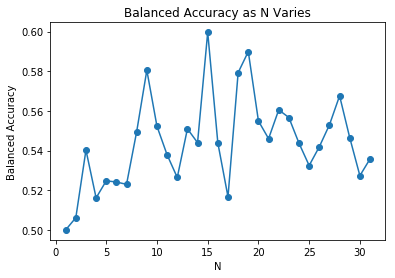

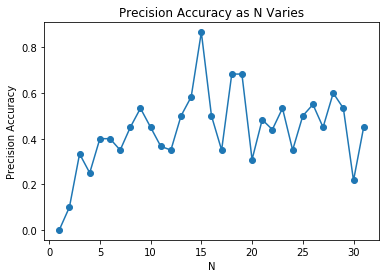

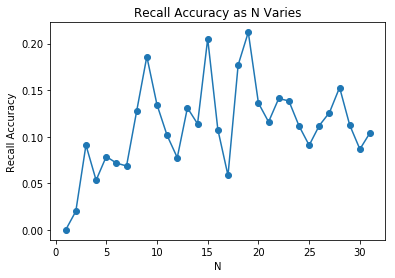

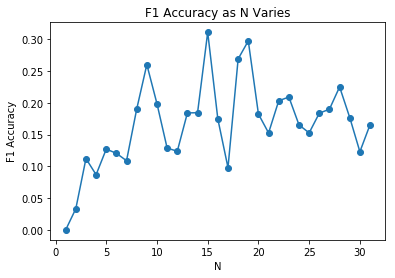

In [49]:
#plotting different accuracies as a function of hyperparameter values 1-30
import matplotlib.pyplot as plt
plt.figure()
plt.plot(nvals, acc1, 'o-')
plt.title('Balanced Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Balanced Accuracy')
plt.figure()
plt.plot(nvals, acc2, 'o-')
plt.title('Precision Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Precision Accuracy')
plt.figure()
plt.plot(nvals, acc3, 'o-')
plt.title('Recall Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Recall Accuracy')
plt.figure()
plt.plot(nvals, acc4, 'o-')
plt.title('F1 Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('F1 Accuracy')


[1286, 1960, 2060, 2363, 6990, 8190, 11447, 15210, 21590]
(142, 9)
0.6912393162393162
0.5405405405405405


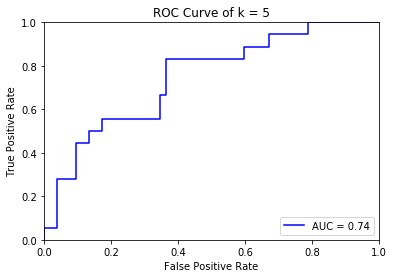

In [111]:
# using tuned hyperparameter depth = 5, calculate balanced accuracy and plot roc curve
#use 1/3 of data set aside prior to tuning. 
#After split, perform hypothesis testing to filter relevant genes, and SMOTE oversampling to accont for class imbalance
#70% balanced accuracy, AUC = 0.74
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
y = data[22215].transpose()
x = data[0:22215].transpose()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
X_train = X_train.transpose()
X_test = X_test.transpose()
indices = []
pval = []
j = 0
while j < len(X_train):
    x = [];
    y = [];
    for val in range(len(X_train[0])):
        if y_train[val] == 1:
            x.append(X_train[j,val]);
        else:
            y.append(X_train[j,val]);
    stat, p = ranksums(x,y)   
    if p < .05 / 22215:
        gene_count += 1;
        indices.append(j);
        pval.append(p)
    j += 1;
print(indices)
xtrain = X_train[indices,:];
xtest = X_test[indices, :];
xtrain = xtrain.transpose()
xtest = xtest.transpose()
ytrain = y_train.transpose()
print(xtrain.shape)
oversample = SMOTE();
X_smote, Y_smote = oversample.fit_resample(xtrain,ytrain)
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_smote, Y_smote)
ypred = rf.predict(xtest)
print(balanced_accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred))
y_scores = rf.predict_proba(xtest)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of k = 5')
plt.show()

In [14]:
y = data[22215].transpose();
x = data[0:22215].transpose();
X_train1, X_test, y_train1, y_test = train_test_split(x, y, 
                                                    train_size=0.67, 
                                                    random_state=42)

In [32]:
#Random Forest Hyperparameter tuning with SMOTE Oversampling and hypothersis testing filtering w bonferroni
#k = 5 is hyperparameter val selected as balanced accuracy, f1 score, precision highest 
# Final testing on test portion of dataset k = 5 hyperparamter value done above 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import ranksums
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
y = data[22215].transpose();
x = data[0:22215].transpose();
nvals = np.arange(start=1, stop=32);
acc1 = [];
acc2 = [];
acc3 = [];
acc4 = [];
numrows, numcols = data.shape;
for k in nvals:  
    print(k)
    acc = [];
    acc_2 = [];
    acc_3 = [];
    acc_4 = [];
    y = data[22215].transpose();
    x = data[0:22215].transpose();
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(x):
        y = data[22215].transpose();
        x = data[0:22215].transpose();
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        xtrain = xtrain.transpose();
        xtest = xtest.transpose();
        j = 0;
        gene_count = 0;
        indices = [];
        p_vals = [];
        while j < len(xtrain):
            x = [];
            y = [];
            for val in range(len(xtrain[0])):
                if ytrain[val] == 1:
                    x.append(xtrain[j,val]);
                else:
                    y.append(xtrain[j,val]);
            stat, p = ranksums(x,y)   
            if p < .05 / 22215:
                gene_count += 1;
                indices.append(j);
            j += 1;
        xtrain = xtrain[indices,:];
        xtest = xtest[indices, :];
        xtrain = xtrain.transpose();
        xtest = xtest.transpose();
        print(xtrain.shape)
        oversample = SMOTE();
        X_smote, Y_smote = oversample.fit_resample(xtrain,ytrain)
        rf = RandomForestClassifier(max_depth=k, random_state=0)
        rf.fit(X_smote, Y_smote)

        ypred = rf.predict(xtest)

        acc.append(balanced_accuracy_score(ytest, ypred))
        acc_2.append(precision_score(ytest, ypred))
        acc_3.append(recall_score(ytest, ypred))
        acc_4.append(f1_score(ytest,ypred))

    acc1.append(np.mean(acc));
    acc2.append(np.mean(acc_2));
    acc3.append(np.mean(acc_3));
    acc4.append(np.mean(acc_4));
print(acc1)

1
(190, 16)
(190, 55)
(191, 20)
(191, 30)
(191, 27)
(191, 16)
(191, 10)
(191, 28)
(191, 22)
(191, 31)
2
(190, 23)
(190, 33)
(191, 34)
(191, 14)
(191, 11)
(191, 53)
(191, 41)
(191, 18)
(191, 10)
(191, 29)
3
(190, 33)
(190, 18)
(191, 21)
(191, 54)
(191, 7)
(191, 19)
(191, 23)
(191, 21)
(191, 35)
(191, 21)
4
(190, 15)
(190, 27)
(191, 33)
(191, 32)
(191, 18)
(191, 7)
(191, 20)
(191, 65)
(191, 19)
(191, 33)
5
(190, 20)
(190, 21)
(191, 15)
(191, 46)
(191, 23)
(191, 20)
(191, 31)
(191, 24)
(191, 26)
(191, 23)
6
(190, 34)
(190, 15)
(191, 26)
(191, 33)
(191, 24)
(191, 19)
(191, 25)
(191, 8)
(191, 20)
(191, 53)
7
(190, 48)
(190, 65)
(191, 29)
(191, 28)
(191, 30)
(191, 28)
(191, 24)
(191, 12)
(191, 7)
(191, 5)
8
(190, 29)
(190, 23)
(191, 17)
(191, 21)
(191, 18)
(191, 27)
(191, 28)
(191, 24)
(191, 31)
(191, 30)
9
(190, 24)
(190, 21)
(191, 27)
(191, 12)
(191, 51)
(191, 27)
(191, 30)
(191, 32)
(191, 20)
(191, 15)
10
(190, 31)
(190, 22)
(191, 50)
(191, 60)
(191, 25)
(191, 37)
(191, 6)
(191, 23)
(191,

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(191, 21)
(191, 21)
(191, 48)
(191, 26)
(191, 38)
28
(190, 34)
(190, 21)
(191, 16)
(191, 8)
(191, 57)
(191, 37)
(191, 19)
(191, 42)
(191, 34)
(191, 9)
29
(190, 29)
(190, 20)
(191, 12)
(191, 28)
(191, 20)
(191, 25)
(191, 32)
(191, 44)
(191, 18)
(191, 21)
30
(190, 15)
(190, 16)
(191, 41)
(191, 32)
(191, 15)
(191, 17)
(191, 24)
(191, 19)
(191, 40)
(191, 22)
31
(190, 38)
(190, 19)
(191, 29)
(191, 17)
(191, 19)
(191, 33)
(191, 27)
(191, 26)
(191, 20)
(191, 21)
[0.6681899105796164, 0.6563171550671552, 0.6168671679197995, 0.6681409929939344, 0.6969039987789988, 0.6549198717948719, 0.6755804367201426, 0.6550098675833971, 0.63980580693816, 0.6249054989128519, 0.6153668839330604, 0.6459572344150517, 0.614761276305394, 0.6938567785413762, 0.5877647352647353, 0.6183852707749766, 0.6648221468074409, 0.6244590643274853, 0.6412021640640061, 0.644763739442532, 0.5945887701479806, 0.6615385472370766, 0.6152014980633401, 0.6425161603102779, 0.6429131652661064, 0.666964420383538, 0.6000811157796451, 0.60

Text(0, 0.5, 'F1 Accuracy')

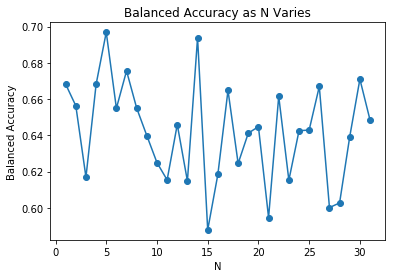

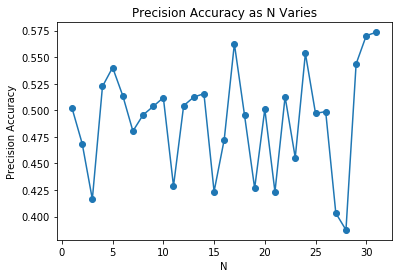

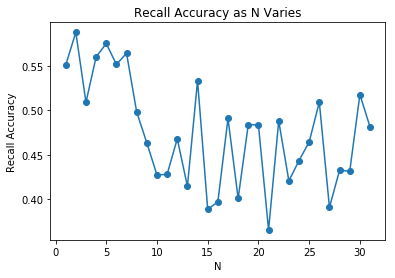

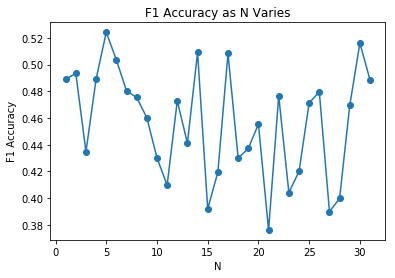

In [33]:
# plotting accuracies as hyperparamter varies 
plt.figure()
plt.plot(nvals, acc1, 'o-')
plt.title('Balanced Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Balanced Accuracy')
plt.figure()
plt.plot(nvals, acc2, 'o-')
plt.title('Precision Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Precision Accuracy')
plt.figure()
plt.plot(nvals, acc3, 'o-')
plt.title('Recall Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Recall Accuracy')
plt.figure()
plt.plot(nvals, acc4, 'o-')
plt.title('F1 Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('F1 Accuracy')

In [45]:
#logistic reg classifcation with SMOTE, NO Hypothesis testing filter
# still random splits and calc of each 4 accuracies, no hyperparameter, looping just for better approx
from sklearn.linear_model import LogisticRegression
y = data[22215].transpose();
x = data[0:22215].transpose();
nvals = np.arange(start=1, stop=32);
acc1 = [];
acc2 = [];
acc3 = [];
acc4 = [];
numrows, numcols = data.shape;
for j in nvals:    
    acc = [];
    acc_2 = [];
    acc_3 = [];
    acc_4 = [];
    y = data[22215].transpose();
    x = data[0:22215].transpose();
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(x):
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        oversample = SMOTE();
        X_smote, Y_smote = oversample.fit_resample(xtrain,ytrain)
        lr = LogisticRegression(random_state = 0)
        lr.fit(X_smote, Y_smote)
        ypred = lr.predict(xtest)
        acc.append(balanced_accuracy_score(ytest, ypred))
        acc_2.append(precision_score(ytest, ypred))
        acc_3.append(recall_score(ytest, ypred))
        acc_4.append(f1_score(ytest,ypred))

    acc1.append(np.mean(acc));
    acc2.append(np.mean(acc_2));
    acc3.append(np.mean(acc_3));
    acc4.append(np.mean(acc_4));
print(acc1)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.6446953781512604, 0.6514278083028083, 0.6752871762740184, 0.6572910382101558, 0.6998241314069487, 0.6658413971649265, 0.6410833692451339, 0.6706636500754147, 0.6497380683042447, 0.6872746983408748, 0.6764186507936508, 0.6899257278669043, 0.6917775443510739, 0.6541498778998779, 0.6731015512265512, 0.642918986757996, 0.6791430097680098, 0.6454125816993463, 0.6332703081232492, 0.6789087301587301, 0.6779420141262247, 0.6775809761703724, 0.661386509732098, 0.6555508870214753, 0.6550279581529582, 0.6507712508080156, 0.6845175249587013, 0.6776874595992244, 0.6534689901601667, 0.6772016178266178, 0.6519302592832005]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0, 0.5, 'F1 Accuracy')

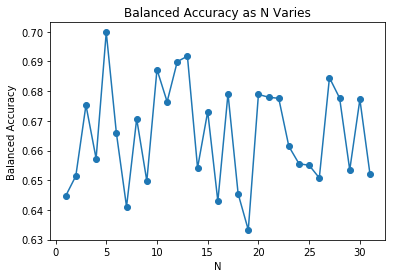

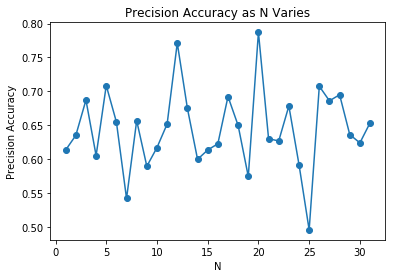

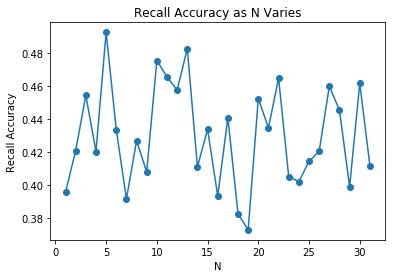

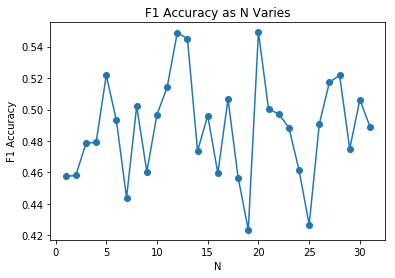

In [46]:
# plotting accuracies over 30 iterations of loop for logistic regression
# note the high variabiity 
plt.figure()
plt.plot(nvals, acc1, 'o-')
plt.title('Balanced Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Balanced Accuracy')
plt.figure()
plt.plot(nvals, acc2, 'o-')
plt.title('Precision Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Precision Accuracy')
plt.figure()
plt.plot(nvals, acc3, 'o-')
plt.title('Recall Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Recall Accuracy')
plt.figure()
plt.plot(nvals, acc4, 'o-')
plt.title('F1 Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('F1 Accuracy')

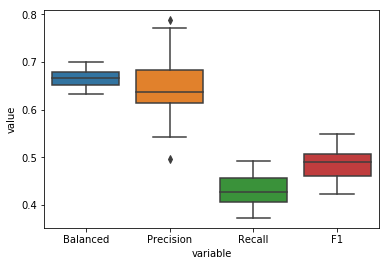

In [47]:
#using seaborne to boxplot accuracy data with sample size 30 for each accuracy
df = pd.DataFrame({'Balanced':acc1, 'Precision': acc2, 'Recall':acc3,'F1':acc4}, columns = ['Balanced', 'Precision','Recall','F1'])
df = pd.DataFrame(data=df, columns=["Balanced", "Precision", "Recall", "F1"])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [38]:
#Logistic regression using SMOTE and hypothesis testing filtering this time, same 30 iterations 
y = data[22215].transpose();
x = data[0:22215].transpose();
nvals = np.arange(start=1, stop=32);
acc1 = [];
acc2 = [];
acc3 = [];
acc4 = [];
numrows, numcols = data.shape;
for k in nvals:  
    print(k)
    acc = [];
    acc_2 = [];
    acc_3 = [];
    acc_4 = [];
    y = data[22215].transpose();
    x = data[0:22215].transpose();
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(x):
        y = data[22215].transpose();
        x = data[0:22215].transpose();
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        xtrain = xtrain.transpose();
        xtest = xtest.transpose();
        j = 0;
        gene_count = 0;
        indices = [];
        p_vals = [];
        while j < len(xtrain):
            x = [];
            y = [];
            for val in range(len(xtrain[0])):
                if ytrain[val] == 1:
                    x.append(xtrain[j,val]);
                else:
                    y.append(xtrain[j,val]);
            stat, p = ranksums(x,y)   
            if p < .05 / 22215:
                gene_count += 1;
                indices.append(j);
            j += 1;
        xtrain = xtrain[indices,:];
        xtest = xtest[indices, :];
        xtrain = xtrain.transpose();
        xtest = xtest.transpose();
        oversample = SMOTE();
        X_smote, Y_smote = oversample.fit_resample(xtrain,ytrain)
        lr = LogisticRegression(random_state=0)
        lr.fit(X_smote, Y_smote)

        ypred = lr.predict(xtest)

        acc.append(balanced_accuracy_score(ytest, ypred))
        acc_2.append(precision_score(ytest, ypred))
        acc_3.append(recall_score(ytest, ypred))
        acc_4.append(f1_score(ytest,ypred))

    acc1.append(np.mean(acc));
    acc2.append(np.mean(acc_2));
    acc3.append(np.mean(acc_3));
    acc4.append(np.mean(acc_4));
print(acc1)

1


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


2


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


3


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


4


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


5


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


6


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


7


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


8


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


9


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


10


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


11


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


12


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


13


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


14


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


15


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


16


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


17


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


18


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


19


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


20


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


21


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


22


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


23


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


24


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


25


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


26


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


27


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


28


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


29


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


30


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


31


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.6461395997793056, 0.6280238279522335, 0.6574913244650088, 0.6075496031746033, 0.6679192702722115, 0.7039937513466926, 0.6412913638648934, 0.6034979889391655, 0.6269971899016016, 0.6414722940458234, 0.6418876589097178, 0.6396088307117719, 0.60247625568446, 0.5829948646125117, 0.6724558993637941, 0.6055712669683257, 0.6626774695892342, 0.606689425770308, 0.6919583969951617, 0.6569257703081233, 0.6334847015729369, 0.6779621848739495, 0.6137464985994397, 0.6771288515406162, 0.6355753519356461, 0.6229111003375708, 0.6642127684407096, 0.6710279304029305, 0.6368835550414498, 0.5937622100122101, 0.6574931260689775]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0, 0.5, 'F1 Accuracy')

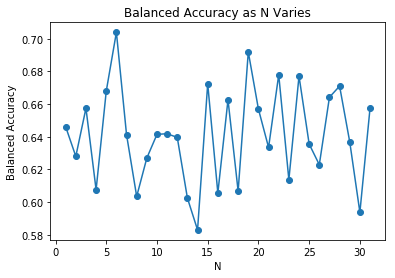

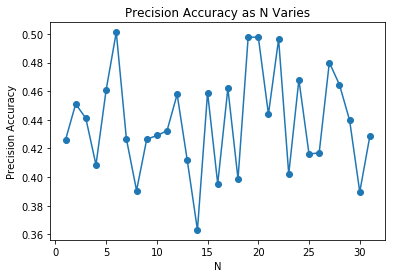

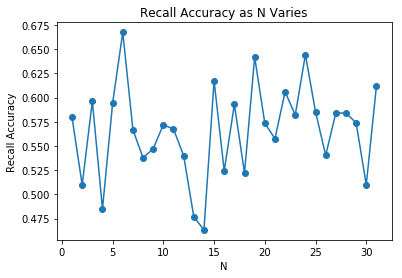

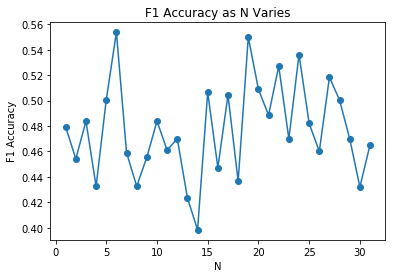

In [39]:
#plotting log reg over iterations with SMOTE and hypothesis testing filtering applied 
plt.figure()
plt.plot(nvals, acc1, 'o-')
plt.title('Balanced Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Balanced Accuracy')
plt.figure()
plt.plot(nvals, acc2, 'o-')
plt.title('Precision Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Precision Accuracy')
plt.figure()
plt.plot(nvals, acc3, 'o-')
plt.title('Recall Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Recall Accuracy')
plt.figure()
plt.plot(nvals, acc4, 'o-')
plt.title('F1 Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('F1 Accuracy')

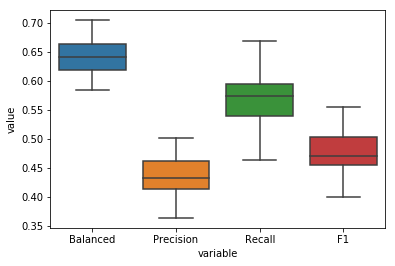

In [44]:
#boxolotting with SMOTE and hypothesis testing, 30 sample size
import seaborn as sns
df = pd.DataFrame({'Balanced':acc1, 'Precision': acc2, 'Recall':acc3,'F1':acc4}, columns = ['Balanced', 'Precision','Recall','F1'])
df = pd.DataFrame(data=df, columns=["Balanced", "Precision", "Recall", "F1"])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()
